In [4]:
import pandas as pd
import re

def clean_text(text):
    if isinstance(text, str):
        # Hapus karakter non-ASCII
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        # Hapus karakter kontrol
        text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    return text

# Baca dataset
dataset_judi = pd.read_csv('judi.csv', encoding='latin1', on_bad_lines='skip', sep=';')
dataset_nonjudi = pd.read_csv('nonjudi.csv', encoding='latin1', on_bad_lines='skip', sep=';')

# Kolom-kolom yang ingin dibersihkan
columns_to_clean = ['text_content', 'meta_title', 'meta_description', 'meta_keywords']

# Bersihkan kolom-kolom tersebut jika ada
for column in columns_to_clean:
    if column in dataset_judi.columns:
        dataset_judi[column] = dataset_judi[column].apply(clean_text)
    else:
        print(f"Kolom '{column}' tidak ditemukan di dataset judi.")

    if column in dataset_nonjudi.columns:
        dataset_nonjudi[column] = dataset_nonjudi[column].apply(clean_text)
    else:
        print(f"Kolom '{column}' tidak ditemukan di dataset non-judi.")

# Simpan dataset yang sudah dibersihkan
dataset_judi.to_csv('cleaned_dataset_judi.csv', index=False)
dataset_nonjudi.to_csv('cleaned_dataset_nonjudi.csv', index=False)

In [14]:
import pandas as pd
import re

def clean_text(text):
    if isinstance(text, str):
        # Ubah teks menjadi lowercase
        text = text.lower()
        
        # Hapus URLs
        text = re.sub(r'http\S+|www\.\S+', '', text)
        
        # Hapus hashtags
        text = re.sub(r'#\w+', '', text)
        
        # Hapus mentions (misalnya pada Twitter)
        text = re.sub(r'@\w+', '', text)
        
        # Hapus simbol dan karakter spesial (termasuk emoji)
        text = re.sub(r'[^\w\s]', '', text)
        
        # Hapus karakter non-ASCII
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        
        # Hapus karakter kontrol
        text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
        
        # Hapus pengulangan kata
        text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
        
        # Hapus pengulangan tanda baca
        text = re.sub(r'([?.!,])\1+', r'\1', text)
        
        # Hapus spasi ekstra
        text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Baca dataset
dataset_judi = pd.read_csv('judi.csv', encoding='latin1', on_bad_lines='skip', sep=';')
dataset_nonjudi = pd.read_csv('nonjudi.csv', encoding='latin1', on_bad_lines='skip', sep=';')

# Kolom-kolom yang ingin dibersihkan
columns_to_clean = ['text_content', 'meta_title', 'meta_description', 'meta_keywords']

# Bersihkan kolom-kolom tersebut jika ada
for column in columns_to_clean:
    if column in dataset_judi.columns:
        dataset_judi[column] = dataset_judi[column].apply(clean_text)
    else:
        print(f"Kolom '{column}' tidak ditemukan di dataset judi.")

    if column in dataset_nonjudi.columns:
        dataset_nonjudi[column] = dataset_nonjudi[column].apply(clean_text)
    else:
        print(f"Kolom '{column}' tidak ditemukan di dataset non-judi.")

# Simpan dataset yang sudah dibersihkan
dataset_judi.to_csv('cleaned_dataset_judi.csv', index=False)
dataset_nonjudi.to_csv('cleaned_dataset_nonjudi.csv', index=False)

In [17]:
df_judi = pd.read_csv('cleaned_dataset_judi.csv')

print(df_judi.head())

                                                 url              domain  \
0  https://isimupacitan.ac.id/wp-content/site/?pr...  isimupacitan.ac.id   
1                     https://www.royaltykitten.com/   royaltykitten.com   
2                      https://www.menangmenang.org/    menangmenang.org   
3  https://uin-alauddin.ac.id/tulisan/detail/judi...  uin-alauddin.ac.id   
4  https://slotkiss8toto.blogspot.com/2023/08/wis...        blogspot.com   

       subdomain domain_ext  \
0            NaN      ac.id   
1            www        com   
2            www        org   
3            NaN      ac.id   
4  slotkiss8toto        com   

                                        text_content  keyword_count  \
0  demo spaceman bandarnya manjain pemain baru ba...             31   
1  situs judi bola online terpercaya uang asli 20...            814   
2  menangmenang situs slot indonesia gampang mena...             14   
3  judi online dalam sorotan islam membongkar bah...             61   
4

In [18]:
df_nonjudi = pd.read_csv('cleaned_dataset_nonjudi.csv')

print(df_nonjudi.head())

                                                 url              domain  \
0  https://www.merdeka.com/politik/harapan-terakh...         merdeka.com   
1  https://www.trenasia.com/fakta-menarik-suku-to...        trenasia.com   
2                   https://musirawaskab.go.id/site/  musirawaskab.go.id   
3  https://jurnaldampak.ft.unand.ac.id/index.php/...         unand.ac.id   
4  https://peternakan.umm.ac.id/ar/berita/istilah...           umm.ac.id   

         subdomain domain_ext  \
0              www        com   
1              www        com   
2              NaN      go.id   
3  jurnaldampak.ft      ac.id   
4       peternakan      ac.id   

                                        text_content  keyword_count  \
0  harapan terakhir nasdem di pertemuan jokowi da...              1   
1  fakta menarik suku togutil yang mendekati area...              0   
2  pemerintah kabupaten musi rawas profil daerah ...              0   
3  dampak lingkungan akibat kegiatan pariwisata d...        

In [21]:
df_judi.sample(10)

,url,domain,subdomain,domain_ext,text_content,keyword_count,meta_title,meta_description,meta_keywords,num_forms,external_links,is_gambling
20303,https://dewacsn5m.club/login,dewacsn5m.club,NaN,club,dewacasinocom live casino online agen casino c...,52,dewacasinocom live casino online agen casino c...,dewacasino adalah promotor casino online terba...,casino online casino live casino agen casino l...,2,javascript /forgot-password| /register,1
15816,https://mantraslot88.netlify.app/,netlify.app,mantraslot88,app,mantraslot88 mantra slot 88 situs mantraslot88...,152,mantraslot88 mantra slot 88 situs mantraslot88...,mantraslot88 adalah situs terpercaya bandar ju...,mantraslot88 mantra slot 88 mantra slot88 mant...,0,http://via4d1.info/?ref=jaminjp| http://via4d1...,1
4978,https://info.stikesalislam.ac.id/mitraslot-7,stikesalislam.ac.id,info,ac.id,mitraslot bandar slot online terbaik sering ka...,16,mitraslot bandar slot online terbaik sering ka...,mitraslot selalu memberikan serta menyediakan ...,NaN,3,//yida.alibaba-inc.com/alibaba/web/APP_NZEYXSP...,1
9401,https://slotdepo5k.app/,slotdepo5k.app,NaN,app,slot depo 5k situs gacor deposit 5000 min depo...,37,slot depo 5k situs gacor deposit 5000 min depo...,sweet bonanza demo free version of the slot fr...,NaN,3,javascript:| https://cekatan.short.gy/depo5k| ...,1
19339,https://bos168slot.net/game-win-bos168/,bos168slot.net,NaN,net,game win bos168 link alternatif situs bos168 s...,22,game win bos168 link alternatif situs bos168 s...,game win bos168 bermain judi dengan modal keci...,NaN,0,#content| /| https://dendimus888.xyz/bosotnt,1
21326,https://id.linkedin.com/pulse/cara-pintar-untu...,linkedin.com,id,com,cara pintar untuk menang main poker uang asli ...,76,cara pintar untuk menang main poker uang asli ...,cara pintar untuk menang main poker uang asli ...,NaN,2,/legal/user-agreement?trk=linkedin-tc_auth-but...,1
15789,https://markastotortp.com/,markastotortp.com,NaN,com,markastoto rtp live slot gacor update setiap h...,11,markastoto rtp live slot gacor update setiap h...,dapatkan informasi rtp markastoto live slot ga...,rtp markastoto rtp live hari ini rtp slot slot...,0,https://t.ly/rtpmarkastoto| https://t.ly/rtpma...,1
19081,https://bisakali.net/demo-slot-x5000-tips-dan-...,bisakali.net,NaN,net,demo slot x5000 tips dan trik menang besar dal...,57,demo slot x5000 tips dan trik menang besar dal...,NaN,NaN,1,https://www.rajasscientific.com/| https://www....,1
24028,https://designixo.com/19dewa/,designixo.com,NaN,com,19dewa bermain slot online dengan uang asli da...,95,19dewa bermain slot online dengan uang asli da...,19dewa adalah situs judi online yang gacor dan...,slotter303 19dewa 19 dewa situs 19dewa situs s...,0,/| https://bit.ly/19dewaaa| /,1
4007,https://www.slot.com/de/free-video-slots,slot.com,www,com,kostenlose videospielautomaten jetzt online sp...,25,kostenlose videospielautomaten jetzt online sp...,NaN,free online slots online slot machines,0,/de| /de/free-classic-slots| /de/free-online-s...,1


In [22]:
df_nonjudi.sample(10)

,url,domain,subdomain,domain_ext,text_content,keyword_count,meta_title,meta_description,meta_keywords,num_forms,external_links,is_gambling
8900,https://kumparan.com/tips-dan-trik/cara-memati...,kumparan.com,NaN,com,cara mematikan last seen ig instagram dengan m...,0,cara mematikan last seen ig instagram dengan m...,simak tata cara mematikan last seen ig dengan ...,instagram berita terkini instagram berita terb...,1,/| /| /,0
15582,https://lifestyle.sindonews.com/read/1414117/1...,sindonews.com,lifestyle,com,7 pantai di gunungkidul yang bagus dan sepi no...,0,7 pantai di gunungkidul yang bagus dan sepi no...,pantai di gunungkidul yang bagus dan sepi bisa...,pantai di gunungkidul pantai terindah wisata p...,3,https://play.google.com/store/apps/details?id=...,0
34913,https://umsu.ac.id/berita/cara-transfer-pulsa-...,umsu.ac.id,NaN,ac.id,cara transfer pulsa telkomsel dengan mudah dan...,0,cara transfer pulsa telkomsel dengan mudah dan...,NaN,NaN,5,http://facebook.com| http://twitter.com| #,0
31618,https://www.antaranews.com/berita/4570006/klas...,antaranews.com,www,com,klasemen liga 1 persib tutup putaran pertama d...,2,klasemen liga 1 persib tutup putaran pertama d...,persib bandung menutup putaran pertama di posi...,NaN,2,https://www.antarafoto.com| https://www.facebo...,0
23547,https://www.cnnindonesia.com/gaya-hidup/202501...,cnnindonesia.com,www,com,terbaru 2025 daftar 76 negara bebas visa untuk...,0,terbaru 2025 daftar 76 negara bebas visa untuk...,menurut henley passport index indonesia sendir...,visa negara serbia37 niue32 indonesia henley p...,1,#| #| #,0
7993,https://radarjabar.disway.id/read/682069/7-hew...,disway.id,radarjabar,id,7 hewan paling pintar di dunia otaknya mirip m...,0,7 hewan paling pintar di dunia otaknya mirip m...,berikut adalah tujuh hewan paling pintar di du...,hewan paling pintar dunia hewan,2,https://www.facebook.com/radarjabar.id/| https...,0
4785,https://www.detik.com/sulsel/sepakbola/d-75822...,detik.com,www,com,kick off indonesia vs bahrain main jam berapa ...,0,kick off indonesia vs bahrain main jam berapa ...,timnas indonesia akan bertanding melawan bahra...,china sportstars 2 cara nonton bahrain vs indo...,1,| #|,0
18760,https://kumparan.com/berita-hari-ini/berapa-ha...,kumparan.com,NaN,com,berapa hari lagi puasa ramadhan 2025 ini predi...,0,berapa hari lagi puasa ramadhan 2025 ini predi...,umat islam perlu mengetahui berapa hari lagi p...,ramadhan berita terkini ramadhan berita terbar...,1,/| /| /,0
34048,https://www.interaksi.me/article-blog/cara-mem...,interaksi.me,www,me,cara memanggil kakak lakilaki dalam bahasa ing...,0,cara memanggil kakak lakilaki dalam bahasa ing...,variasi panggilan kakak laki dalam bahasa ingg...,NaN,7,/| #form-bottom| #,0
21890,https://www.bola.net/tim_nasional/indra-sjafri...,bola.net,www,net,indra sjafri jens raven dan welber jardim kese...,0,indra sjafri jens raven dan welber jardim kese...,pelatih timnas indonesia u20 indra sjafri meng...,timnas indonesia berita timnas indonesia timna...,0,/tim_nasional/| /tag/timnas-indonesia-u-20/,0


In [27]:
print("Number of dataset judi: {}", format(len(df_judi)))

Number of dataset judi: {} 24335


In [26]:
print("Number of dataset nonJudi: {}", format(len(df_nonjudi)))

Number of dataset nonJudi: {} 36528


In [31]:
pip install scikit-learn

  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 11.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 11.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   - -------------------------------------- 2.1/43.6 MB 11.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/43.6 MB 7.0 MB/s eta 0:00:06
   ---- ----------------------------------- 5.2/43.6 MB 8.6 MB/s eta 0:00:05
   ------ --------------------------------- 7.1/43.6 MB 8.9 MB/s eta 0:00:05
   -------- ------------------------------- 9.7/43.6 MB 9.4 MB/s eta 0:00:04
   -----------

In [33]:
import pandas as pd
from sklearn.utils import resample

# Asumsikan dataset_judi dan dataset_nonjudi sudah dibaca dan dibersihkan

# Undersample kelas non-judi
dataset_nonjudi_balanced = resample(df_nonjudi, 
                                    replace=False,    # tidak menggandakan data
                                    n_samples=len(df_judi),  # samakan dengan ukuran dataset_judi
                                    random_state=42) # untuk reproduktifitas

# Gabungkan dataset
balanced_dataset = pd.concat([df_judi, dataset_nonjudi_balanced], ignore_index=True)

# Shuffle dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Simpan dataset yang sudah seimbang
balanced_dataset.to_csv('balanced_dataset.csv', index=False)

In [9]:
pip install matplotlib

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.0 MB 11.2 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 11.4 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 11.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


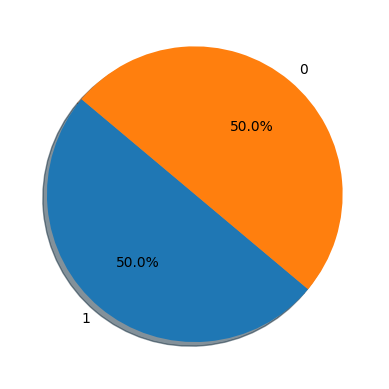

In [34]:
import matplotlib.pyplot as plt
df = pd.read_csv('balanced_dataset.csv')
combined_dataset = df["is_gambling"].value_counts()
plt.pie(combined_dataset, labels=combined_dataset.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [37]:
print("Number of web judi: {}".format(df[df["is_gambling"]==1].count()[0]))
print("Number of web non judi: {}".format(df[df["is_gambling"]==0].count()[0]))

Number of web judi: 24335
Number of web non judi: 24335


C:\Users\Raptor\AppData\Local\Temp\ipykernel_25196\2765504939.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of web judi: {}".format(df[df["is_gambling"]==1].count()[0]))
C:\Users\Raptor\AppData\Local\Temp\ipykernel_25196\2765504939.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Number of web non judi: {}".format(df[df["is_gambling"]==0].count()[0]))


In [39]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
from wordcloud import WordCloud

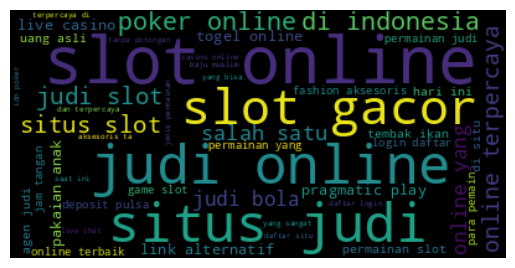

In [41]:
data_web = df[df["is_gambling"]==1]
txt = " ".join(content.lower() for content in data_web["text_content"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

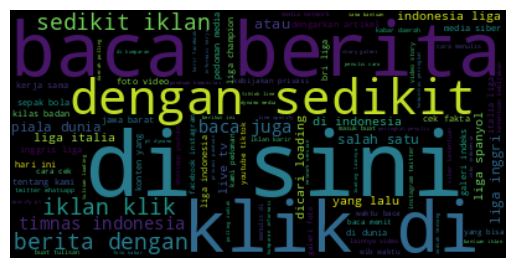

In [42]:
data_web = df[df["is_gambling"]==0]
txt = " ".join(content.lower() for content in data_web["text_content"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [49]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raptor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raptor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Raptor\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [51]:
import pandas as pd
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.data.path.append('C:/Users/Raptor/AppData/Roaming/nltk_data')
# Unduh resource tambahan dari NLTK jika belum diunduh
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('tokenizers/punkt_tab')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')
    nltk.download('stopwords')

# Stop words bahasa Indonesia dari NLTK
stop_words_indonesian = set(stopwords.words('indonesian'))

# Stemmer untuk bahasa Indonesia menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    if isinstance(text, str):
        # Tokenisasi
        tokens = word_tokenize(text)
        
        # Hapus stop words
        tokens = [word for word in tokens if word.lower() not in stop_words_indonesian]
        
        # Stemming
        tokens = [stemmer.stem(word) for word in tokens]
        
        # Gabungkan kembali menjadi string
        return ' '.join(tokens)
    return text

# Asumsikan balanced_dataset sudah ada dan memiliki kolom 'text_content'
balanced_dataset = pd.read_csv('balanced_dataset.csv')
balanced_dataset['text_content'] = balanced_dataset['text_content'].apply(preprocess_text)

# Simpan dataset yang sudah diproses
balanced_dataset.to_csv('final_preprocessed_dataset.csv', index=False)

In [70]:
pip install seaborn gensim tensorflow

Note: you may need to restart the kernel to use updated packages.


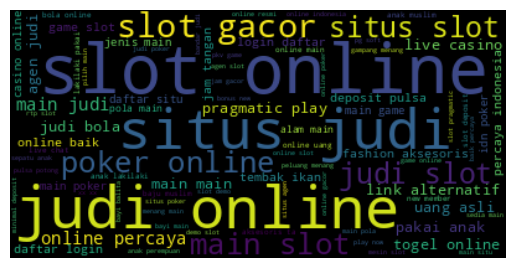

In [77]:
df = pd.read_csv('final_preprocessed_dataset.csv')
data_web = df[df["is_gambling"]==1]
txt = " ".join(content.lower() for content in data_web["text_content"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

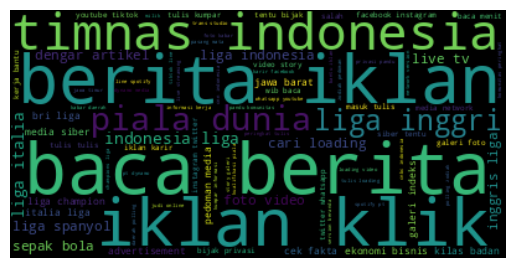

In [78]:
df = pd.read_csv('final_preprocessed_dataset.csv')
data_web = df[df["is_gambling"]==0]
txt = " ".join(content.lower() for content in data_web["text_content"])
worldcloud = WordCloud().generate(txt)
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()